<a href="https://colab.research.google.com/github/iriandi7/Tugas1_AnalisisBigData/blob/main/Tugas_1_Analisis_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from plotnine import *
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load Datasets
course = pd.read_csv('courses.csv')
assesment = pd.read_csv('assessments.csv')
vle = pd.read_csv('vle.csv')
vle_student = pd.read_csv('studentVle.csv')
info_student = pd.read_csv('studentInfo.csv')
reg_student = pd.read_csv('studentRegistration.csv')
asses_student = pd.read_csv('studentAssessment.csv')

# Exploratory Data Analysis (EDA)

In [50]:
course

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [51]:
course.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [52]:
course.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [53]:
assesment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [54]:
assesment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [55]:
assesment.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [56]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [57]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [58]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [59]:
info_student

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [60]:
info_student.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [61]:
info_student.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [62]:
reg_student

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [63]:
reg_student.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [64]:
reg_student.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [65]:
asses_student

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [66]:
asses_student.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [67]:
asses_student.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [68]:
vle_student

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0
...,...,...,...,...,...,...
1702385,BBB,2014J,656481.0,913473.0,95.0,5.0
1702386,BBB,2014J,656481.0,942393.0,95.0,2.0
1702387,BBB,2014J,656557.0,913490.0,95.0,14.0
1702388,BBB,2014J,656540.0,913690.0,95.0,1.0


In [69]:
vle_student.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0


In [70]:
vle_student.describe()

,id_student,id_site,date,sum_click
count,1.702389e+06,1.702389e+06,1.702389e+06,1.702389e+06
mean,7.646740e+05,7.042274e+05,8.714535e+01,3.242191e+00
std,6.721523e+05,1.350797e+05,7.422932e+01,5.279948e+00
min,6.516000e+03,5.427920e+05,-2.400000e+01,1.000000e+00
25%,4.445610e+05,5.466140e+05,2.200000e+01,1.000000e+00
50%,5.615340e+05,7.037410e+05,6.700000e+01,2.000000e+00
75%,6.327520e+05,7.684840e+05,1.480000e+02,4.000000e+00
max,2.698588e+06,1.010323e+06,2.690000e+02,1.326000e+03


In [71]:
# Modul kode dan presentasi kode selalu digunakan bersama untuk mengidentifikasi modul.
# Oleh karena itu, 2 kolom ini akan digabungkan untuk membuat fitur yang mengidentifikasi modul secara unik.

course["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), course.code_module, course.code_presentation))
assesment["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), assesment.code_module, assesment.code_presentation))
vle["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle.code_module, vle.code_presentation))
info_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), info_student.code_module, info_student.code_presentation))
reg_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), reg_student.code_module, reg_student.code_presentation))
vle_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle_student.code_module, vle_student.code_presentation))


print(" In Student Info table; \n # of rows: {} \n # of unique student Ids: {} \n \
Hence, There are different records for same students' different modul enrolments." .format(len(info_student),len(info_student.id_student.unique())))
print("\n This also means that student ID is not really a unique identifier of the table.\n")

 In Student Info table; 
 # of rows: 32593 
 # of unique student Ids: 28785 
 Hence, There are different records for same students' different modul enrolments.

 This also means that student ID is not really a unique identifier of the table.



# Preprocessing Data

<Axes: >

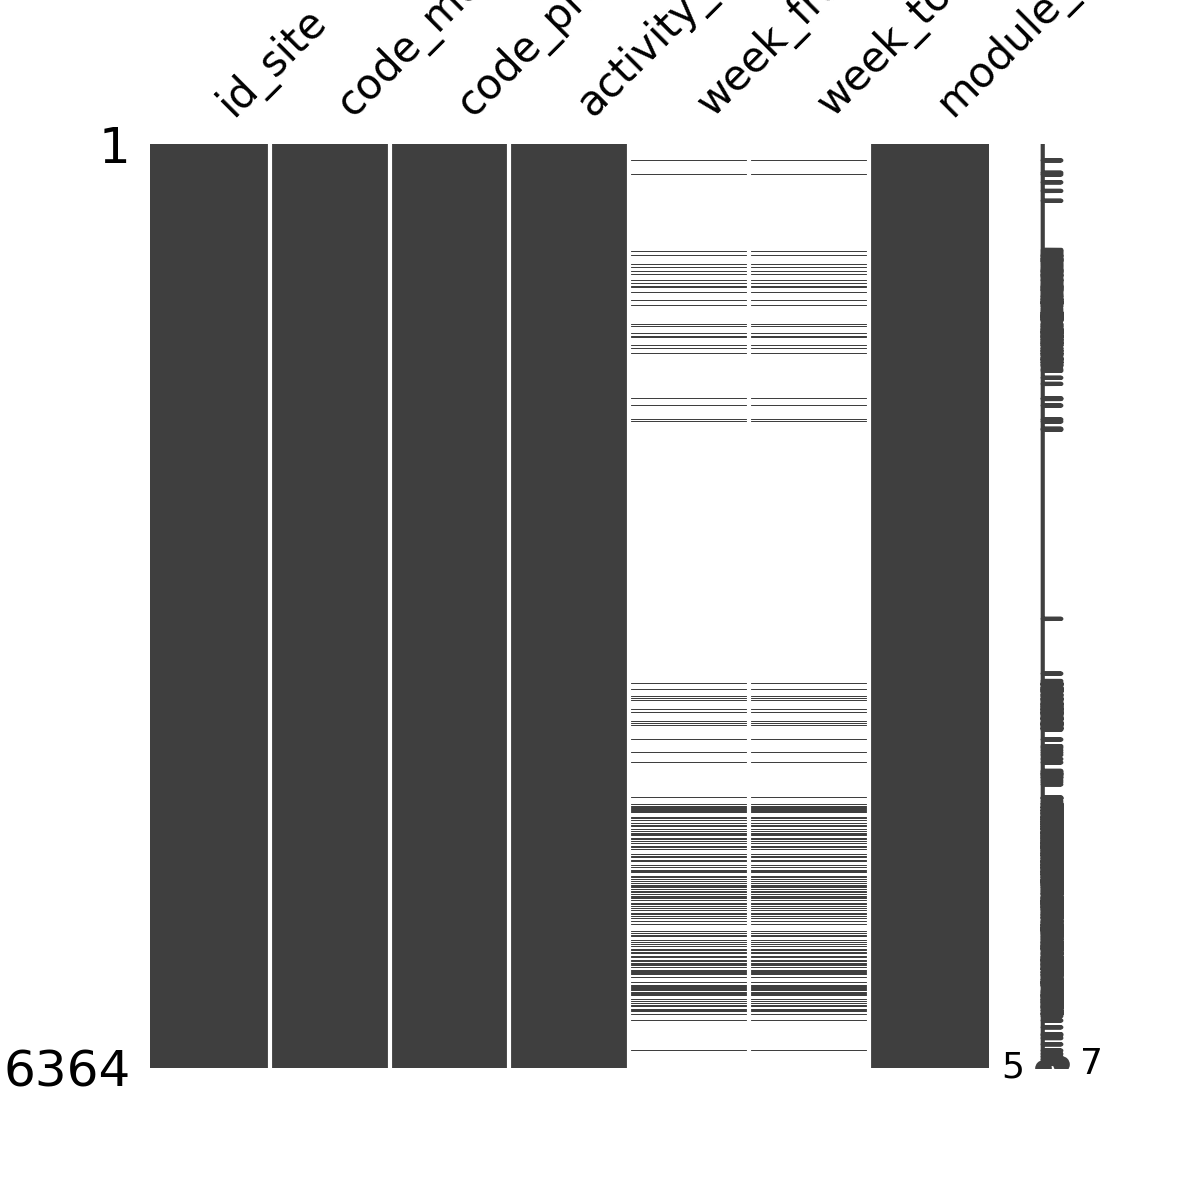

In [72]:
# Mengecek missing value untuk vle
msno.matrix(vle, figsize=(6,6), fontsize=15)

In [73]:
vle.drop(columns=['week_from','week_to'],inplace=True)

<Axes: >

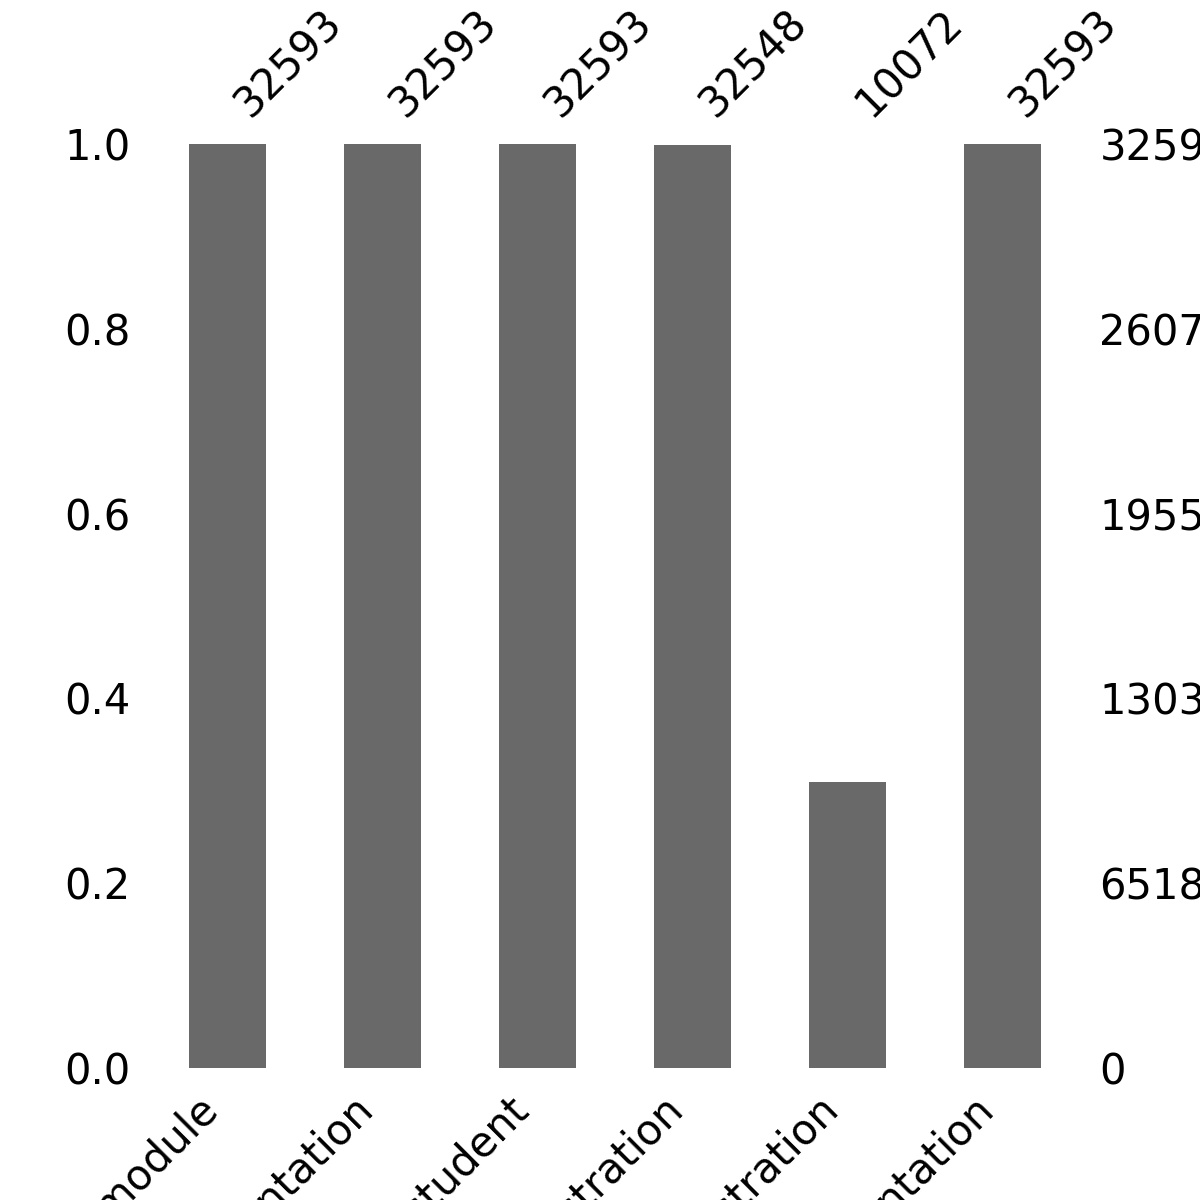

In [74]:
msno.bar(reg_student, figsize=(6,6), fontsize=15)

In [75]:
# Mencari mahasiswa yang belum terdaftar sesuai tabel registrasi.
# Kemudian memeriksa apakah konsisten dengan hasil akhir di tabel StudentInfo.
# Jika seorang mahasiswa tidak terdaftar, hasil akhir harus dicatat sebagai "Withdrawn".


# Pilih mahasiswa yang belum terdaftar berdasarkan tabel registrasi
temp = reg_student.loc[reg_student.date_unregistration.notna(),\
                               ['id_student','module_presentation','date_unregistration']]

# Join untuk melihat baris yang cocok
temp =pd.merge(info_student, temp, on=['id_student','module_presentation'])

# mahasiswa yang tidak terdaftar tanpa tanda "Withdrawn" di kolom hasil akhir
# Semantik Error -- Jika mahasiswa tidak terdaftar, harus ada hasil akhir "Withdrawn"!
wrong_final_results=temp.loc[temp.final_result!='Withdrawn']
incorrect_final_results=wrong_final_results.index
wrong_final_results

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,date_unregistration
719,BBB,2013J,362907,F,South West Region,Lower Than A Level,20-30%,35-55,2,60,N,Fail,BBB_2013J,0.0
724,BBB,2013J,365288,F,South Region,A Level or Equivalent,70-80%,0-35,0,60,N,Fail,BBB_2013J,0.0
869,BBB,2013J,554243,F,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Fail,BBB_2013J,166.0
4961,DDD,2013J,315082,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,DDD_2013J,0.0
5010,DDD,2013J,403052,F,Yorkshire Region,HE Qualification,20-30%,0-35,0,150,N,Fail,DDD_2013J,0.0
5293,DDD,2013J,582954,M,London Region,Lower Than A Level,10-20,0-35,0,120,N,Fail,DDD_2013J,-7.0
7853,FFF,2013J,234004,M,Yorkshire Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,FFF_2013J,0.0
8001,FFF,2013J,523777,M,North Region,A Level or Equivalent,0-10%,35-55,1,60,N,Fail,FFF_2013J,0.0
8340,FFF,2013J,601640,M,London Region,HE Qualification,20-30%,0-35,0,90,N,Fail,FFF_2013J,-4.0


In [76]:
# Koreksi entri final_result tabel info_student
for i in wrong_final_results[['id_student','code_module','code_presentation']].values:
    info_student.loc[(info_student.id_student==i[0])&(info_student.code_module==i[1])&\
                 (info_student.code_presentation==i[2]),'final_result'] = 'Withdrawn'

In [77]:
# Konsistensi Bobot Penilaian dalam penjelasan tabel Penilaian,
# bobot ujian harus berjumlah %100 dan penilaian lainnya harus berjumlah %100.
# Oleh karena itu, bobot total untuk setiap module_presentation harus 200.
assesment.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

In [78]:
# Modul CCC menambahkan hingga 300 dan modul GGG menambahkan hingga 100 -- 2 modul ini akan diselidiki.
assesment[assesment.code_module.isin(["CCC","GGG"])]\
.groupby(['code_module','code_presentation',"assessment_type"]).agg(type_weights = ('weight',sum))

type_weights
code_module code_presentation assessment_type              
CCC         2014B             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
            2014J             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
GGG         2013J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014B             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0

In [79]:
# Modul CCC memiliki ketidakkonsistenan. Total bobot ujian adalah 200%. Modul CCC memiliki 2 ujian di setiap presentasi sehingga sangat mungkin untuk dimasukkan sebagai 2 kali 100%, bukan 50% dan 50%. Ini akan diperbaiki pada langkah berikutnya.
# Modul GGG juga tidak kompatibel. Tidak ada bobot yang ditetapkan baik untuk tipe TMA maupun tipe CMA. Untuk kenyamanan, bobot penugasan tipe TMA akan diperhitungkan hingga berjumlah 100.

# Bobot ujian dikurangi setengahnya untuk modul CCC
assesment.loc[(assesment.code_module=='CCC') &(assesment.assessment_type=='Exam'),'weight'] = \
assesment.loc[(assesment.code_module=='CCC') &(assesment.assessment_type=='Exam'),'weight']/2

# Bobot penilaian tipe TMA disusun sebesar %100.
assesment.loc[(assesment.code_module=='GGG') & (assesment.assessment_type=='TMA'),'weight']=(100/3)

In [80]:
# Menurunkan Variabel Baru

# Penghitungan nilai dengan menggabungkan 2 tabel sehingga skor dan bobot tugas menjadi satu dalam satu tabel.

# Join dengan tabel Penilaian dan Penilaian mahasiswa
joined=pd.merge(asses_student,assesment,on='id_assessment',how='left')
# Hitung skor tertimbang untuk semua penilaian semua mahasiswa
joined['score*weight']=(joined['score']*joined['weight'])

# Jumlahkan skor*bobot dan bagi dengan total bobot (Ada beberapa mahasiswa yang memiliki bobot total lebih tinggi atau jauh lebih rendah dari %100)
# untuk semua mahasiswa dari semua modul untuk menghitung nilai akhir.
marks=joined.groupby(['id_student','code_module','code_presentation'],as_index=False)['score*weight','weight'].sum()

marks['adjusted_mark'] = marks['score*weight']/marks['weight']
marks["mark"]  = marks['score*weight']/200
marks.rename(columns = {'score*weight': 'total_score*weight', 'weight': 'attempted_weight'}, inplace=True)
marks = marks.round(1)

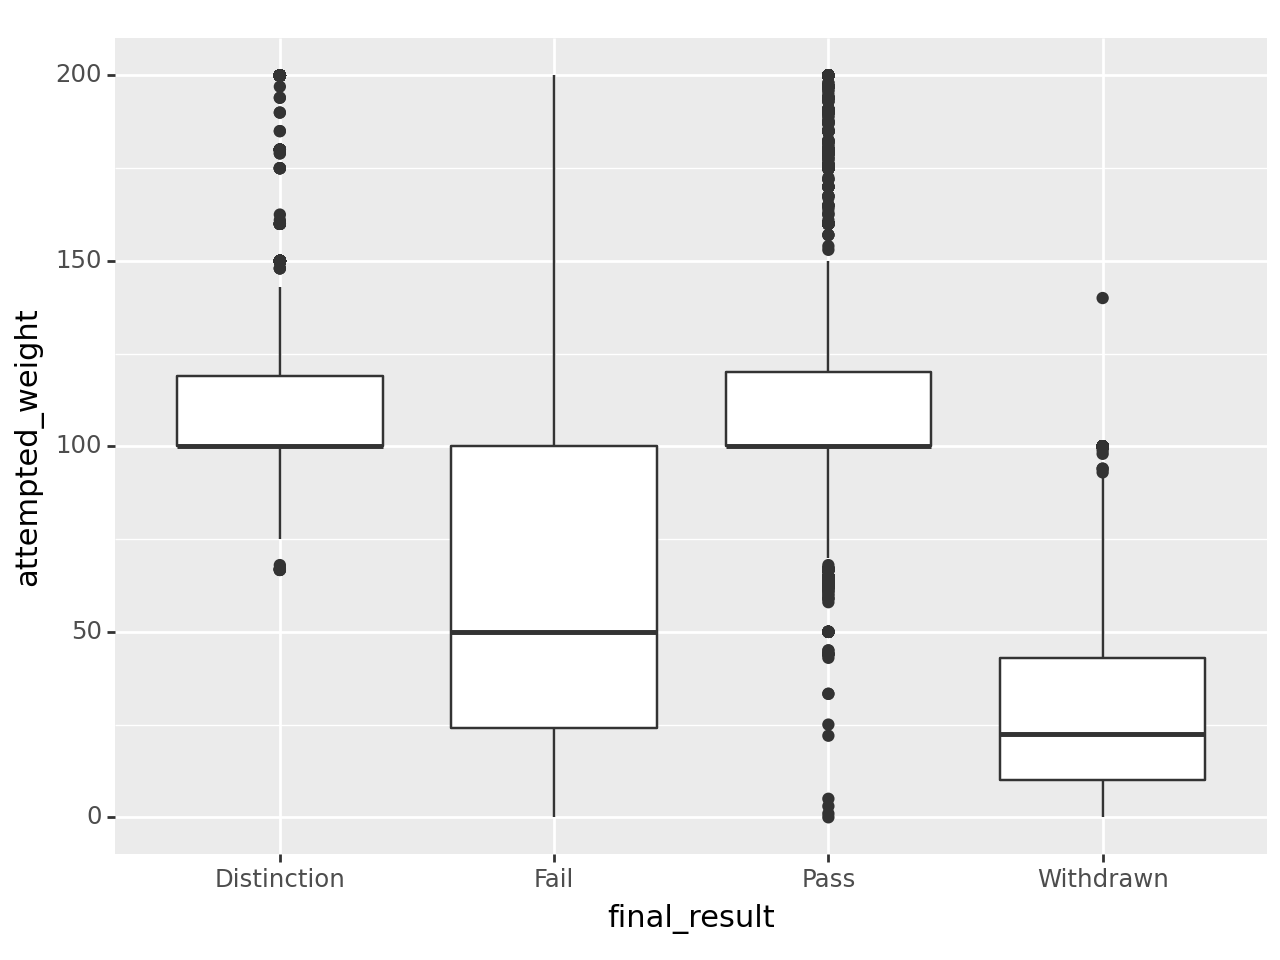

<Figure Size: (640 x 480)>

In [81]:
# Menggabungkan tabel nilai dengan info_student untuk mendapatkan tabel yang lebih besar
# berisi semua informasi relevan tentang kesuksesan, karakteristik siswa, dan demografi.
joined = pd.merge(marks,info_student,on=['id_student','code_module','code_presentation'],how='left')

# Bisa jadi ada mahasiswa yang mencoba beberapa tugas namun kemudian membatalkan mata kuliahnya,
# Variabel nilai mungkin mempunyai nilai bagi mahasiswa tersebut.
# Tanda ini tidak boleh digunakan dalam analisis sehingga akan diganti dengan NaN sebagai berikut.
joined.loc[joined.final_result=='Withdrawn','mark']= np.nan
joined.loc[joined.final_result=='Withdrawn','adjusted_mark']= np.nan

ggplot(joined) + geom_boxplot(aes(x="final_result", y="attempted_weight"))

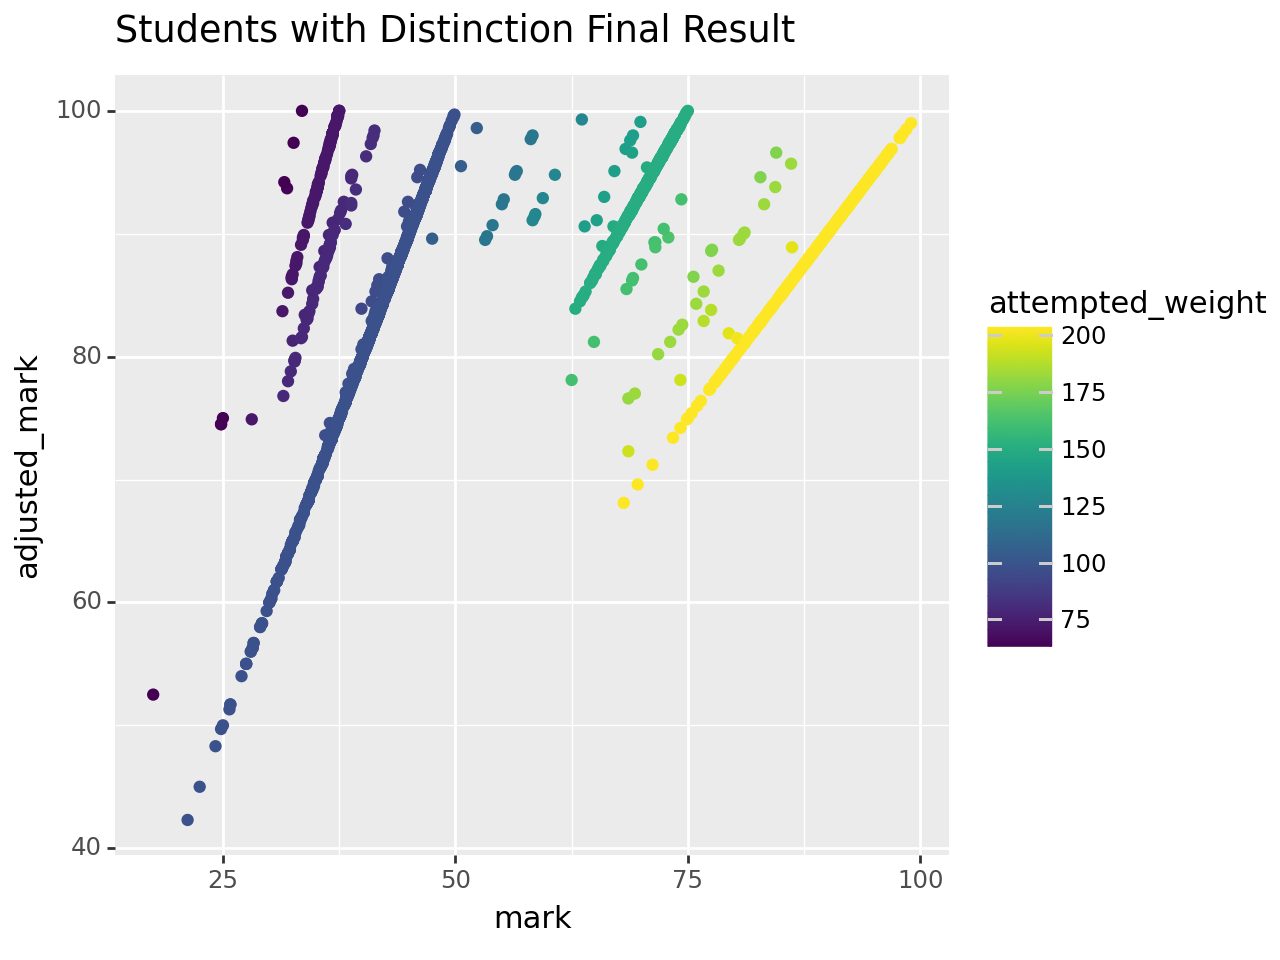

<Figure Size: (640 x 480)>

In [82]:
ggplot(joined[joined.final_result=="Distinction"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Distinction Final Result")

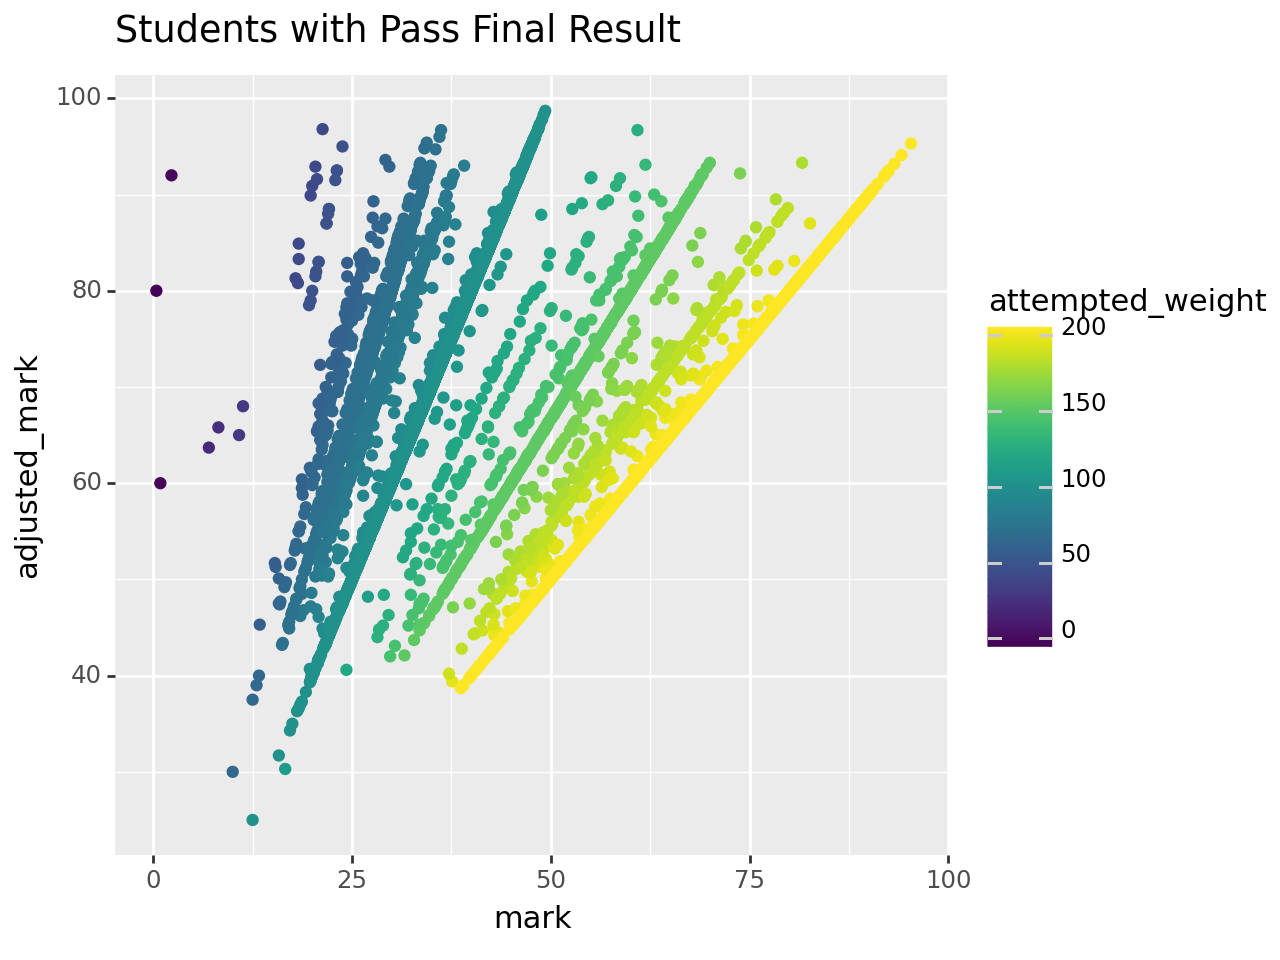

<Figure Size: (640 x 480)>

In [83]:
ggplot(joined[joined.final_result=="Pass"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Pass Final Result")

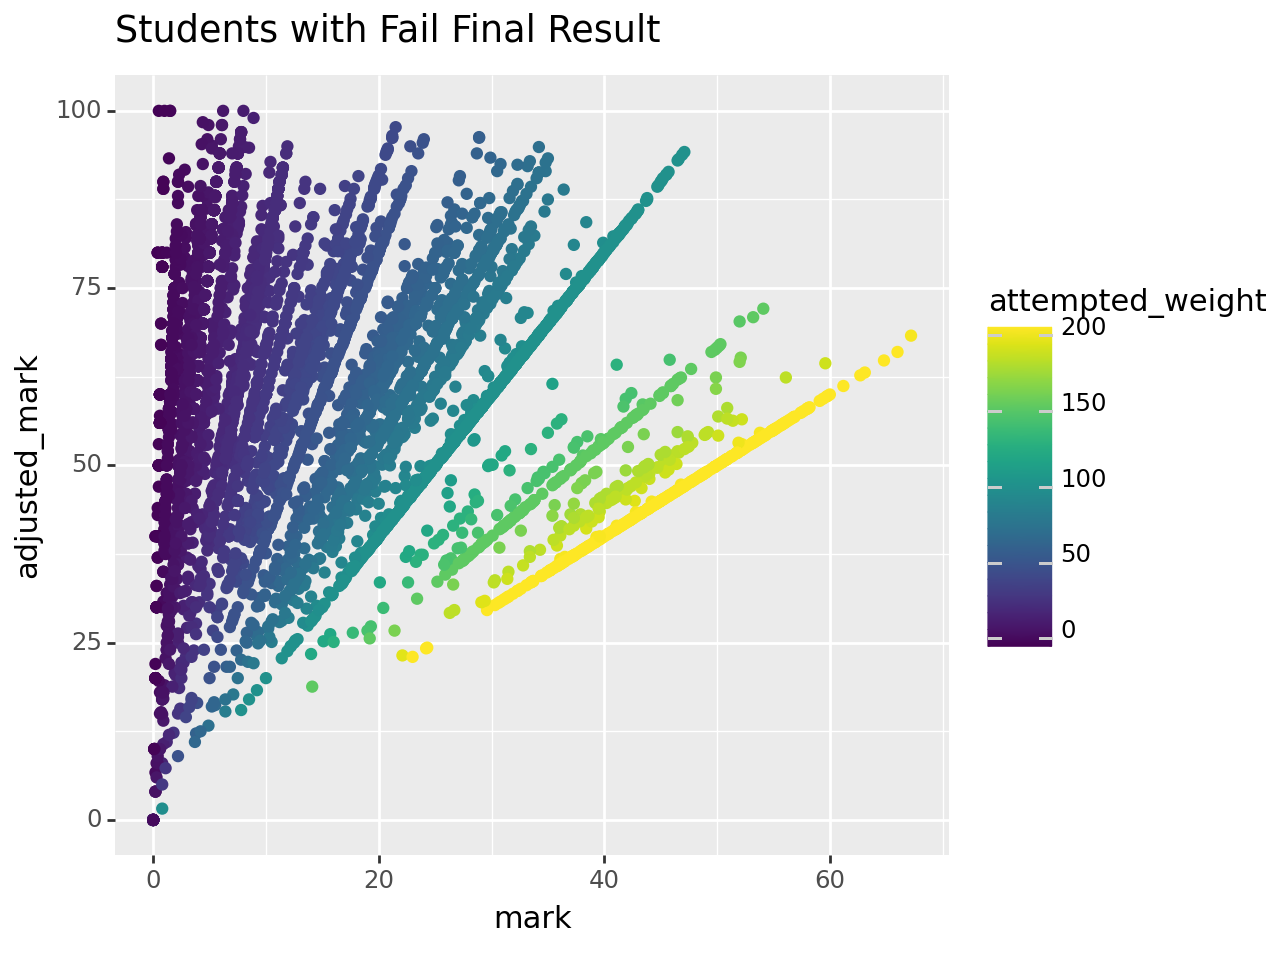

<Figure Size: (640 x 480)>

In [84]:
ggplot(joined[joined.final_result=="Fail"]) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Fail Final Result")

In [85]:
distinction = joined[joined.final_result=="Distinction"].index
passing = joined[joined.final_result=="Pass"].index
fail = joined[joined.final_result=="Fail"].index
withdraw = joined[joined.final_result=="Withdraw"].index


attempt_weight200 = joined[joined.attempted_weight==200].index
attempt_weight150_200 = joined[(joined.attempted_weight>=150) & (joined.attempted_weight!=200)].index
attempt_weight0_150 = joined.index.difference(attempt_weight200).difference(attempt_weight150_200)

adj_mark80_100 = joined[joined.attempted_weight>=80].index
adj_mark70_80 = joined[(joined.attempted_weight>=70) & (joined.attempted_weight<80)].index
adj_mark0_70 = joined[joined.attempted_weight<70].index

mark40_100 = joined[joined.attempted_weight>=40].index
mark0_40 = joined[joined.attempted_weight<40].index

In [86]:
# Mahasiswa dengan attempted_weight 200
joined.loc[(attempt_weight200) & (adj_mark80_100), "final_result"] = "Distinction"
joined.loc[(attempt_weight200) & (adj_mark70_80), "final_result"] = "Pass"
joined.loc[(attempt_weight200) & (adj_mark0_70), "final_result"] = "Fail"

# Mahasiswa dengan attempted_weight antara 150 and 200
joined.loc[(attempt_weight150_200) & (passing) & (adj_mark80_100), "final_result"] = "Distinction"
joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "final_result"] = "Pass"
joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "adjusted_mark"] = joined.loc[(attempt_weight150_200) & (fail) & (mark40_100), "mark"]

# Siswa dengan attempted_weight lebih rendah dari 150 -- Mengurutkan dan menetapkan ulang adj_mark seperti dijelaskan di atas
joined.loc[joined.loc[(attempt_weight0_150) & (distinction)].mark.sort_values().index,"adjusted_mark"] = np.arange(70.0, 100.0, 30/len(joined.loc[(attempt_weight0_150) & (distinction)]))
joined.loc[joined.loc[(attempt_weight0_150) & (passing)].mark.sort_values().index,"adjusted_mark"] = np.arange(40.0, 70.0, 30/len(joined.loc[(attempt_weight0_150) & (passing)]))
joined.loc[joined.loc[(attempt_weight0_150) & (fail)].mark.sort_values().index,"adjusted_mark"] = np.arange(0.0, 40.0, 40/len(joined.loc[(attempt_weight0_150) & (fail)]))

df = joined

# Visualisasi Data

<Axes: xlabel='adjusted_mark', ylabel='Density'>

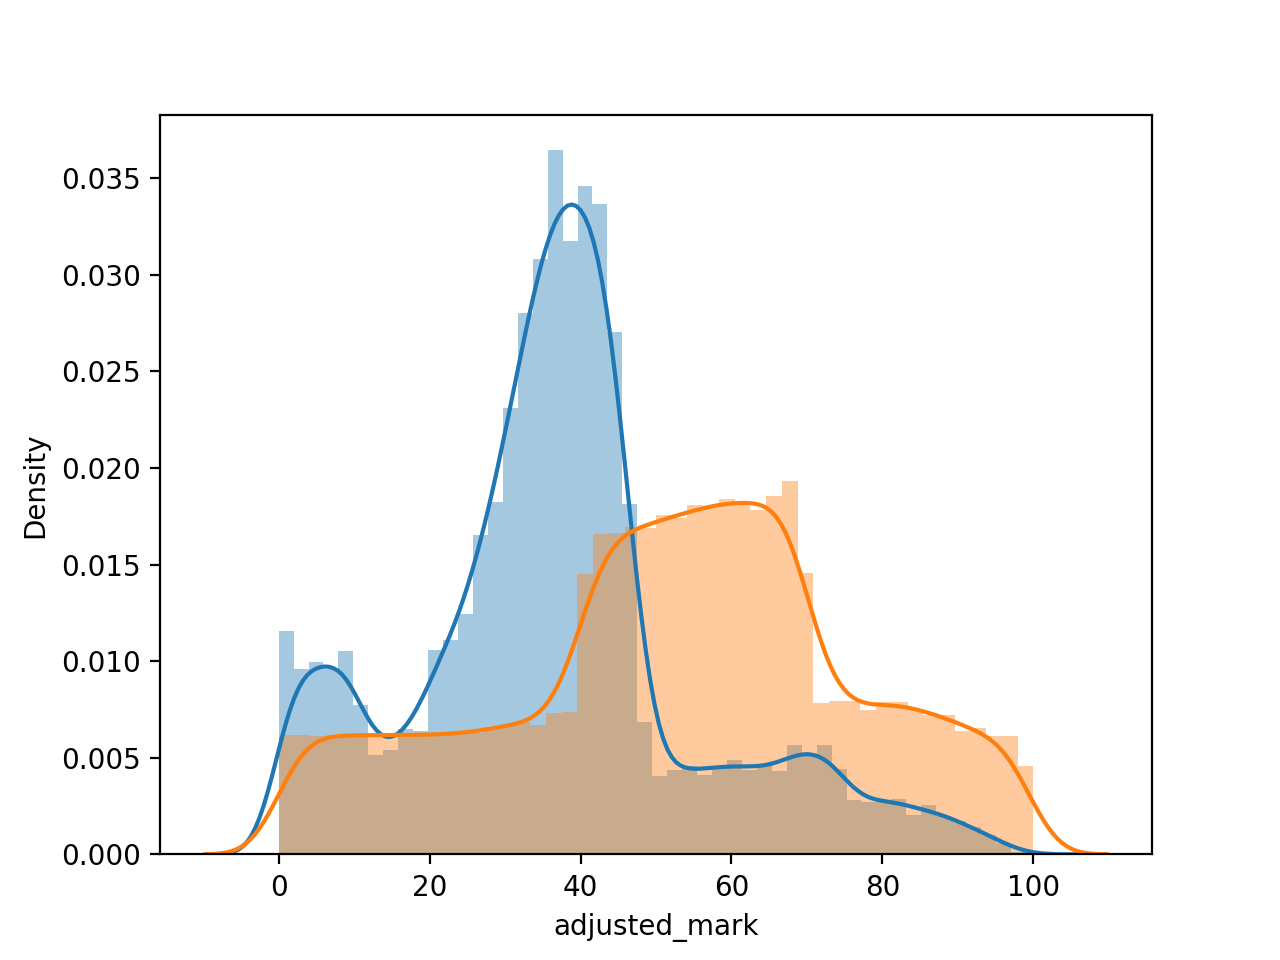

In [87]:
sns.distplot(df.loc[df.mark.notnull(),"mark"])
sns.distplot(df.loc[df.adjusted_mark.notnull(),"adjusted_mark"])

- "adjusted_mark" Variabel  lebih seimbang meskipun terlihat dibuat-buat, mungkin karena distribusi tanda linier yang memiliki bobot_total lebih rendah dari 150.
- "mark" agak miring ke kanan mungkin karena tugas yang hilang dihitung 0. Beberapa tugas ini sebenarnya tidak nol.
- "adjusted_mark" adalah ukuran yang lebih optimis dalam hal keberhasilan siswa.

[Text(0, 0, 'Pass'),
 Text(1, 0, 'Distinction'),
 Text(2, 0, 'Fail'),
 Text(3, 0, 'Withdrawn')]

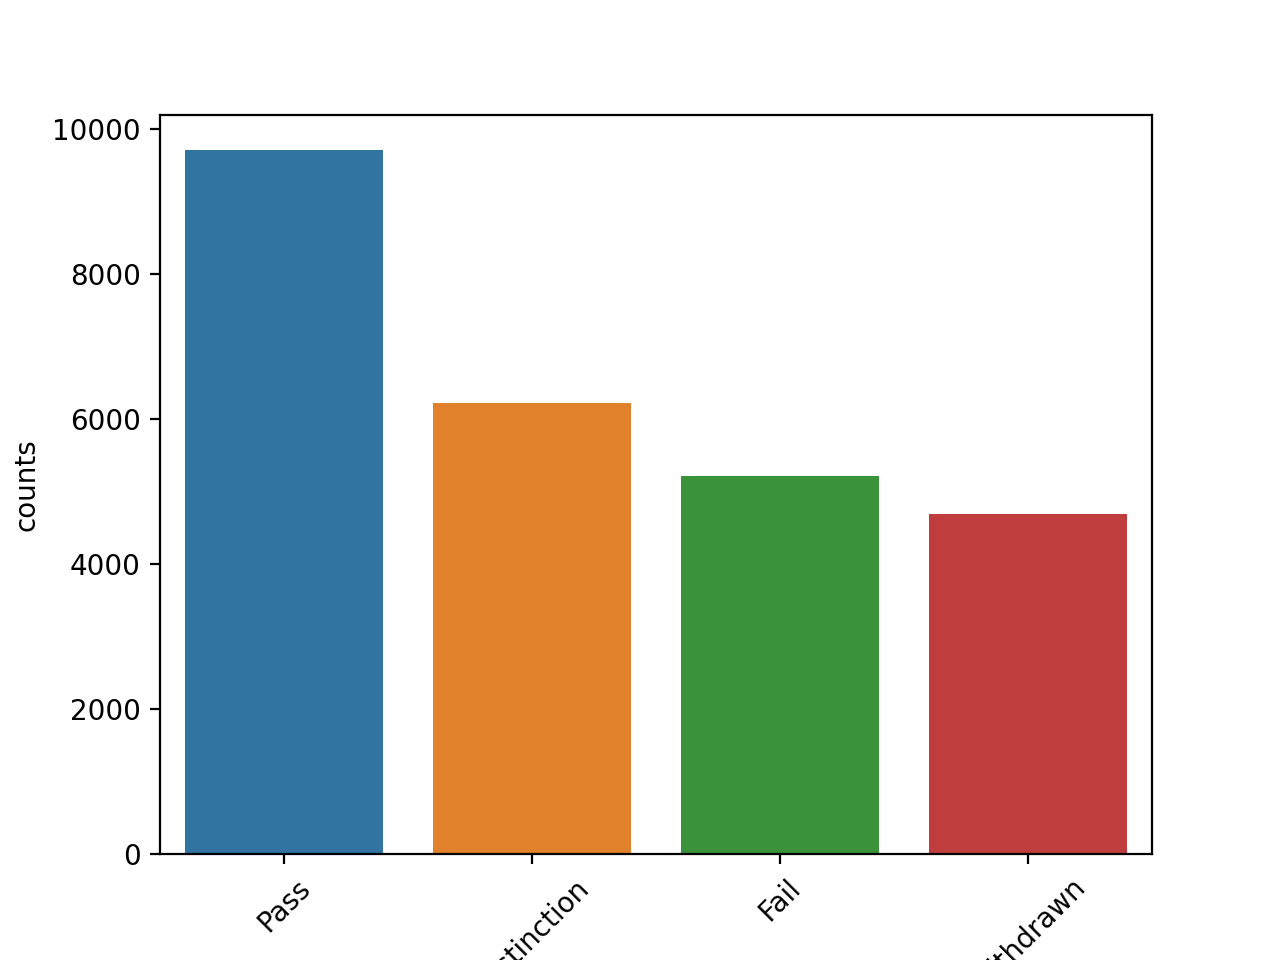

In [88]:
result_counts =  pd.DataFrame(df.final_result.value_counts()).reset_index()
result_counts = result_counts.rename(columns={"index": "final_result", "final_result":"counts"})

chart = sns.barplot(x="final_result", y="counts"  ,data=result_counts)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

"final_result" cukup seragam dibandingkan dengan "mark". Seseorang dapat mengklaim bahwa "final_result" dan "adjusted_mark" terlihat konsisten.

[Text(0, 0, 'A Level or Equivalent'),
 Text(1, 0, 'Lower Than A Level'),
 Text(2, 0, 'HE Qualification'),
 Text(3, 0, 'Post Graduate Qualification'),
 Text(4, 0, 'No Formal quals')]

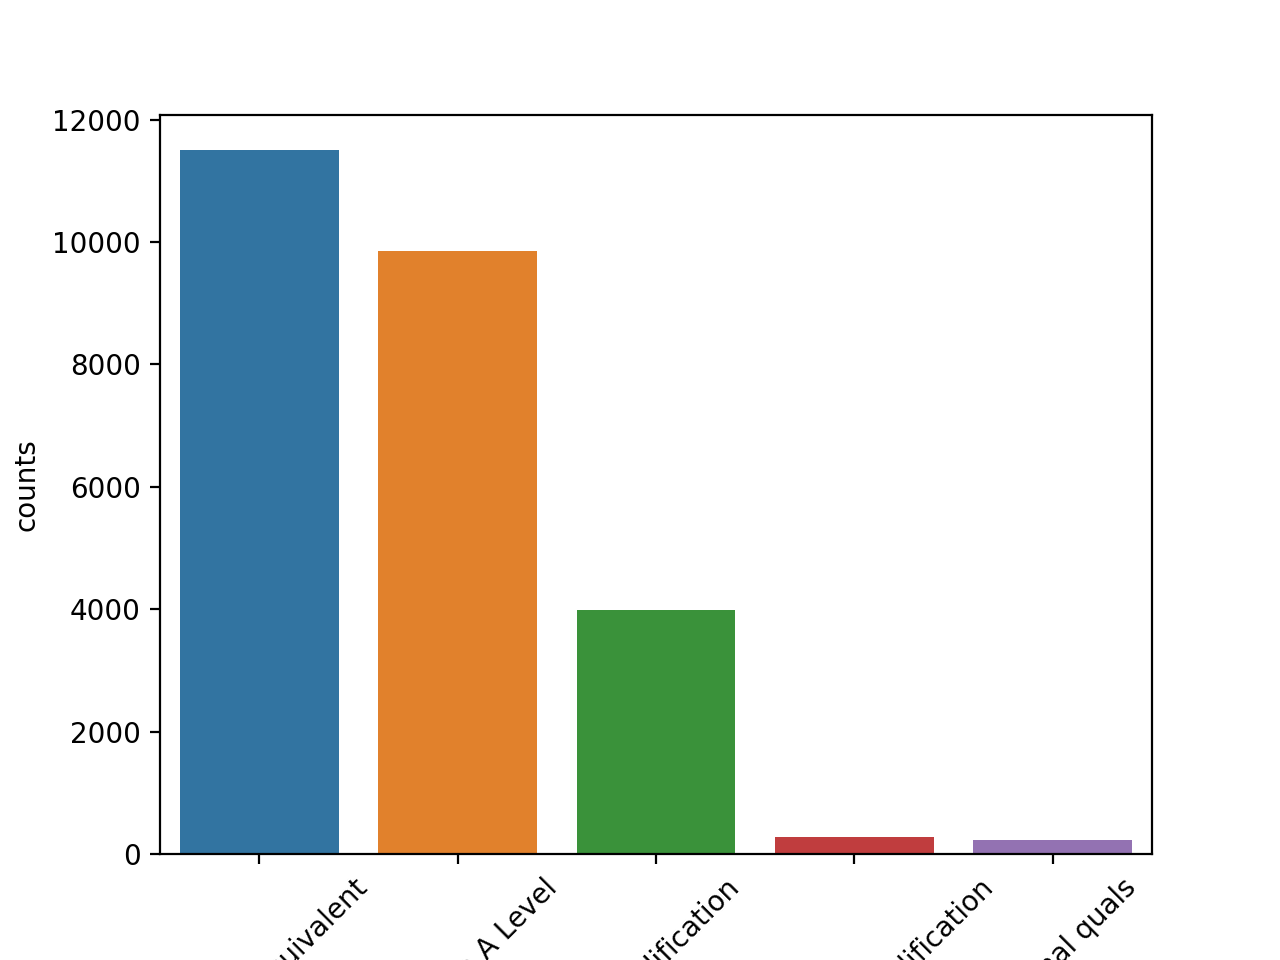

In [89]:
education_counts =  pd.DataFrame(df.highest_education.value_counts()).reset_index()
education_counts = education_counts.rename(columns={"index": "highest_education", "highest_education":"counts"})

chart = sns.barplot(x="highest_education", y="counts"  ,data=education_counts)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

- Sangat sedikit mahasiswa yang memiliki gelar universitas atau lebih tinggi.
- Karena kurangnya titik data, sebaiknya gabungkan grup menjadi 2 seperti "HE atau lebih tinggi" dan "Level atau lebih rendah".

In [90]:
# Gabungkan grup highest_education menjadi 2 grup utama
df["edu"] = list(map(lambda x: "HE or higher" if (x in ["HE Qualification", "Post Graduate Qualification"]) \
                else "Level or lower",df.highest_education))

df = df.drop(["total_score*weight","highest_education","module_presentation"], axis=1)

In [91]:
# Klik untuk setiap id_site untuk semua pendaftaran semua mahasiswa
clicks = pd.merge(vle_student, vle, on=["id_site"])
clicks = clicks.loc[:,["code_module_x","code_presentation_x","id_student","id_site","date","sum_click","activity_type"]]
clicks.rename(columns = {'code_module_x': 'code_module', 'code_presentation_x': 'code_presentation'}, inplace=True)

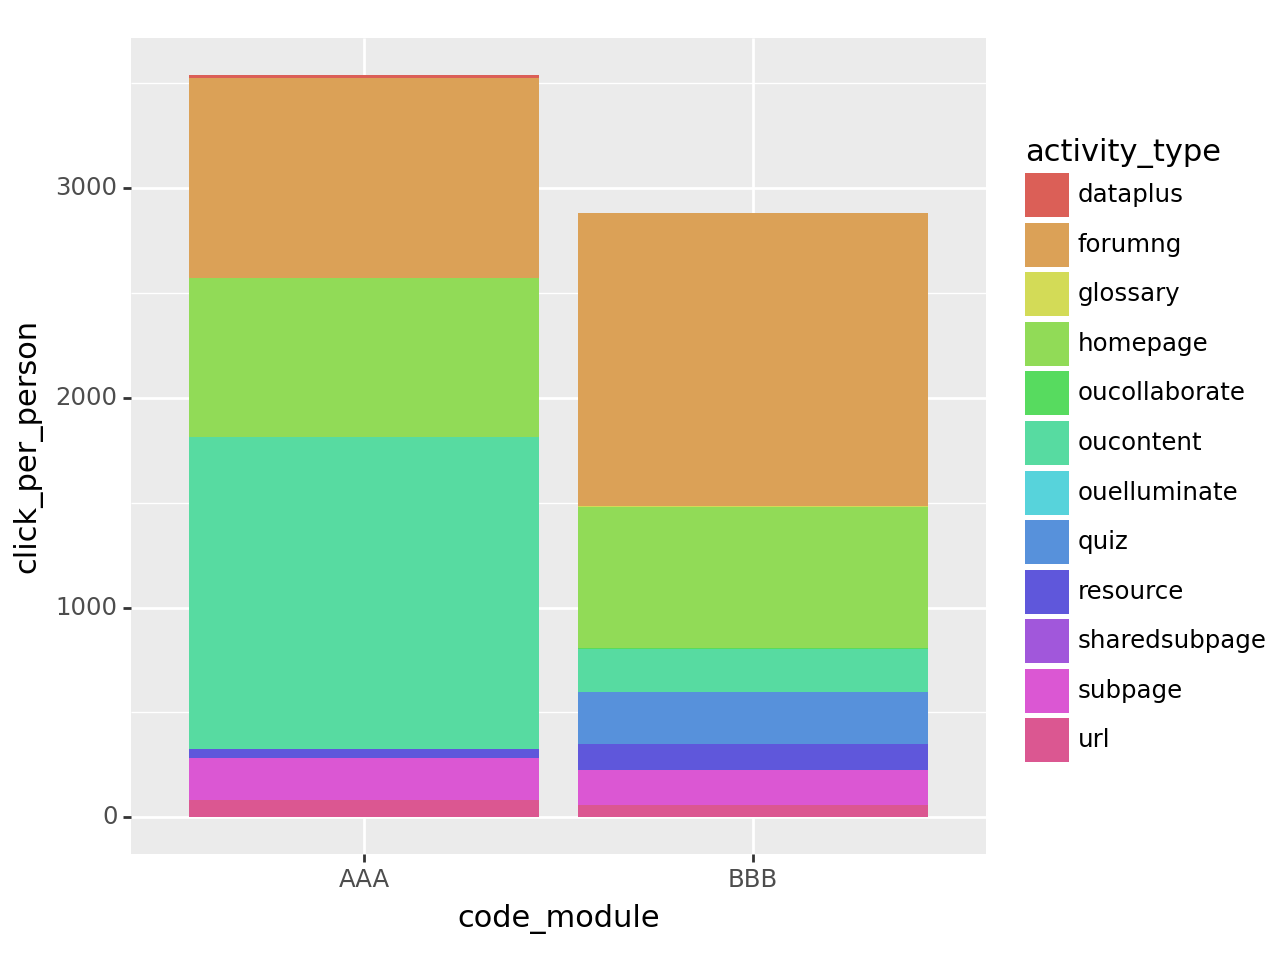

<Figure Size: (640 x 480)>

In [92]:
# Jumlah mahasiswa untuk setiap modul dan presentasi
number_of_students = df.groupby(["code_module","code_presentation"])\
    .agg(stu_count =("id_student", lambda x: x.nunique())).reset_index()

# Jumlah total klik
grouped_clicks = clicks.groupby(["code_module","code_presentation","activity_type"])\
.agg(total_click = ("sum_click",sum)).reset_index()

# Klik per orang
grouped_clicks=pd.merge(grouped_clicks, number_of_students, on=["code_module","code_presentation"], how="left")
grouped_clicks["click_per_person"] = (grouped_clicks["total_click"]/grouped_clicks["stu_count"]).round(1)

# Gambar diagram batang bertumpuk
ggplot(grouped_clicks, aes(fill="activity_type", y="click_per_person", x="code_module")) + \
    geom_bar(position="stack", stat="identity")

In [93]:
# Hasil akhir dihitung untuk 2 tingkat pendidikan berbeda di bawah "edu"
result_counts = pd.DataFrame(df.groupby(["edu"]).final_result.value_counts())\
    .rename(columns={"final_result":"counts"}).reset_index()

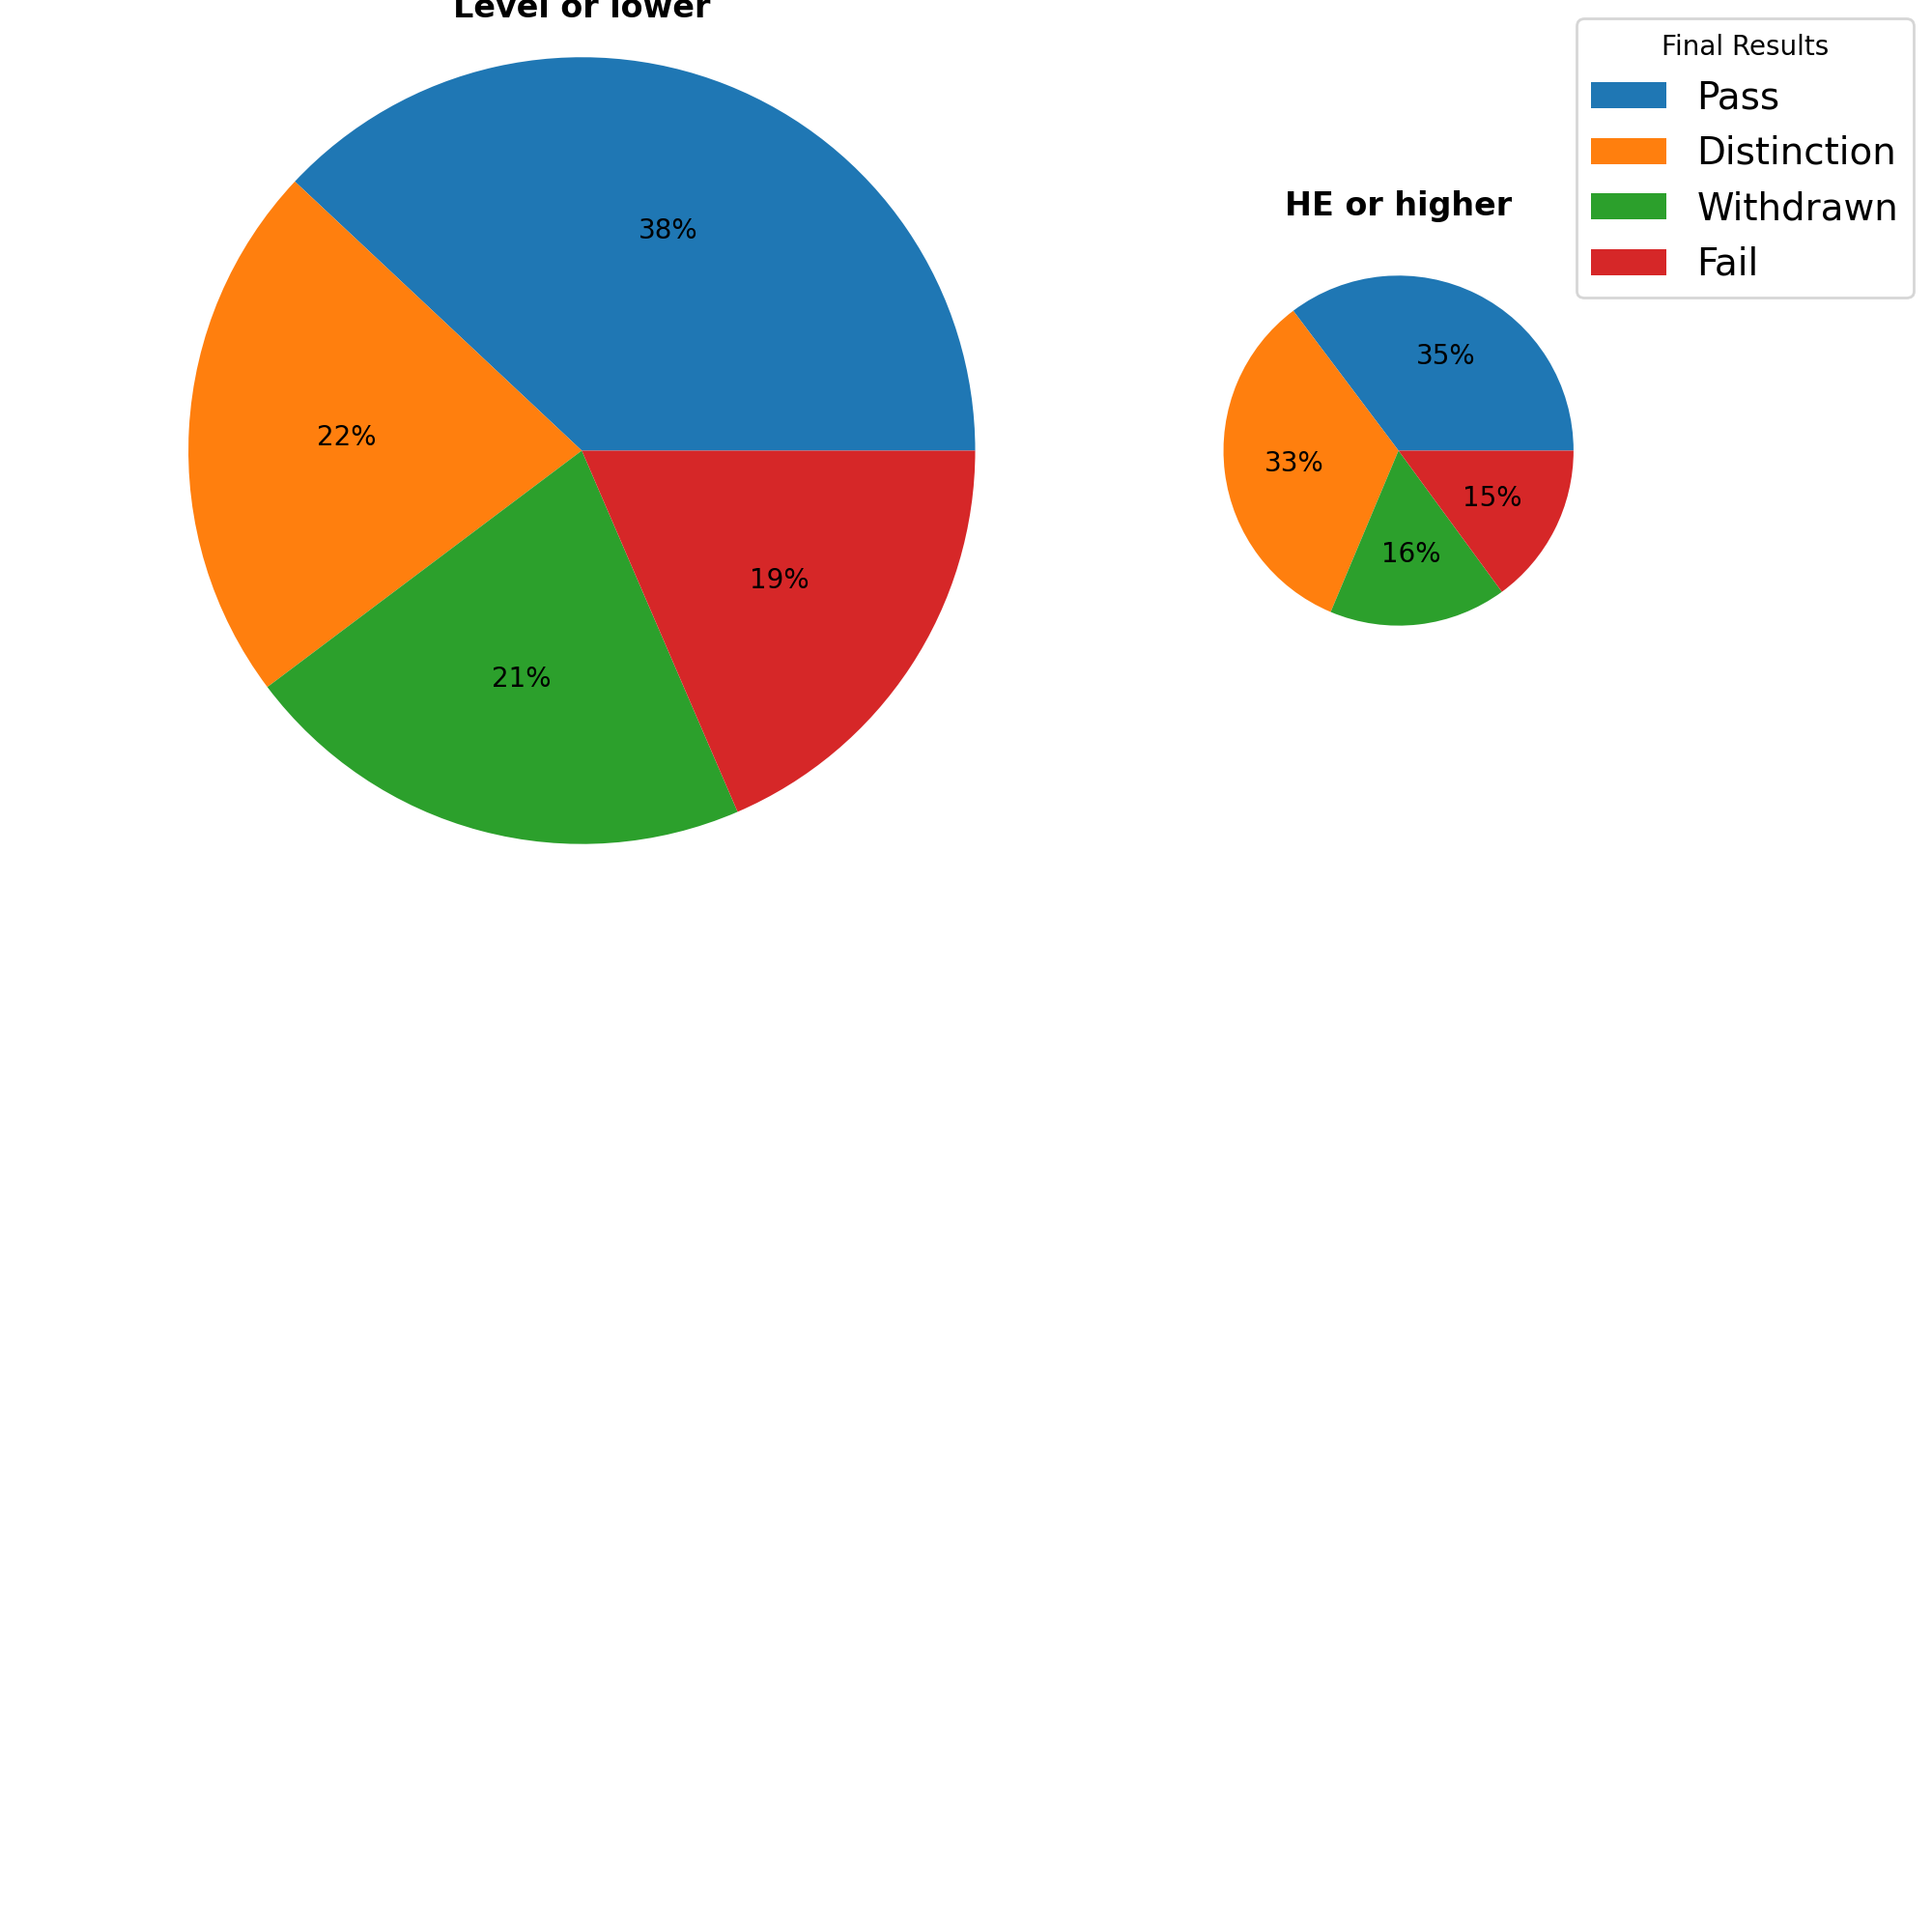

In [94]:
# Gambar diagram lingkarannya
labels = list(result_counts.final_result.unique())
fracs1 = list(result_counts.iloc[4:,].counts)
fracs2 = list(result_counts.iloc[:4,].counts)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(321)
ax1.pie(fracs1, radius=np.sqrt(sum(fracs1)/sum(fracs2)), autopct='%.0f%%')
ax1.set_title("Level or lower", fontdict={'fontweight':"bold"}, pad=80)


ax2 = fig.add_subplot(322)
ax2.pie(fracs2,  autopct='%.0f%%')
ax2.set_title("HE or higher", fontdict={'fontweight':"bold"})


fig.legend(labels=labels, title="Final Results",prop={'size': 14})
plt.show()